In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

from jax import grad
import jax.numpy as jaxnp
from jax import random

In [0]:
def generate_data(number_of_sample_entries):

 #initialize size
  data = np.ndarray((number_of_sample_entries,3))
  label = np.zeros((number_of_sample_entries,3))
  
  #class 1
  class_1 = number_of_sample_entries//3
  data[0:class_1, :] = np.random.uniform(low=1, high=5,size=(class_1,3))
  label[0:class_1, :] = np.array([1,0,0])
  #class 2
  class_2 = class_1 + number_of_sample_entries//3
  data[class_1:class_2, :] = np.random.uniform(low=10, high=15,size=(class_1,3))
  label[class_1:class_2, :] = np.array([0,1,0])
  #class 3
  class_3 = class_2 + number_of_sample_entries//3
  data[class_2:class_3, :] = np.random.uniform(low=20, high=25,size=(class_1,3))
  label[class_2:class_3, :] = np.array([0,0,1])

  #build it into datafram
  x = pd.DataFrame(data)
  labels = pd.DataFrame(label)
  #split data and shuffle data
  X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.3, shuffle=True)

  #return it to array(jax)

  label_test_jax = jaxnp.array(y_test)
  label_train_jax = jaxnp.array(y_train)
  data_train_jax = jaxnp.array(X_train)
  data_test_jax = jaxnp.array(X_test)



  return label_test_jax,label_train_jax,data_train_jax,data_test_jax

In [0]:
label_test,label_train,data_train,data_test = generate_data(300)

In [0]:
def relu(X):
   return jaxnp.maximum(X,0)



def relu_derivative(x):
  return jaxnp.where(x>0, 1, 0)



def softmax(x):
  list_res=[]
  for i in range(len(x)):
    res = jaxnp.exp(x[i])/jaxnp.sum(jaxnp.exp(x[i]))
    list_res.append(res)
  return jaxnp.array(list_res)

# def softmax(x):
#   return (jaxnp.exp(x)) / jaxnp.sum(jaxnp.exp(x))

def sigmoid(x):
  return 1/(1 + jaxnp.exp(-x))

In [0]:
# Initialize our neural network parameters.
key = random.PRNGKey(0)
key, W_key, b_key = random.split(key, 3)

params = {}
params['w_1'] = random.normal(W_key,(3,3))
params['b_1'] = random.normal(b_key,(3,))
params['w_2'] = random.normal(W_key,(3,3))
params['b_2'] = random.normal(b_key,(3,))
params['w_3'] = random.normal(W_key,(3,3))
params['b_3'] = random.normal(b_key,(3,))

In [0]:
def loss_function (data, t, w_1, b_1, w_2, b_2, w_3, b_3):
  J_in = jaxnp.dot(data, jaxnp.transpose(w_1))  + b_1
  J_out = relu(J_in)
  K_in = jaxnp.dot(J_out,jaxnp.transpose(w_2)) + b_2
  K_out = sigmoid(K_in)
  L_in = jaxnp.dot(K_out,jaxnp.transpose(w_3)) + b_3
  L_out = softmax(L_in)

  loss = (1./data.shape[0]) * jaxnp.sum(-t * jaxnp.log(L_out) - (1 - t) * jaxnp.log(1 - L_out))
  return loss

In [0]:
dw_1 = grad(loss_function,2)
db_1 = grad(loss_function,3)

dw_2 = grad(loss_function,4)
db_2 = grad(loss_function,5)

dw_3 = grad(loss_function,6)
db_3 = grad(loss_function,7)

In [0]:
alpha = 0.002
iterations = 5000
cost_list = []
for i in range(iterations):
    loss = loss_function(data_train, label_train, params['w_1'],params['b_1'],params['w_2'],params['b_2'],params['w_3'],params['b_3'])
    
    #weights update
    params['w_1'] -= alpha * dw_1(data_train, label_train, params['w_1'],params['b_1'],params['w_2'],params['b_2'],params['w_3'],params['b_3'])
    params['w_2'] -= alpha * dw_2(data_train, label_train, params['w_1'],params['b_1'],params['w_2'],params['b_2'],params['w_3'],params['b_3'])
    params['w_3'] -= alpha * dw_3(data_train, label_train, params['w_1'],params['b_1'],params['w_2'],params['b_2'],params['w_3'],params['b_3'])
    #bias update
    params['b_1'] -= alpha * db_1(data_train, label_train, params['w_1'],params['b_1'],params['w_2'],params['b_2'],params['w_3'],params['b_3'])
    params['b_2'] -= alpha * db_2(data_train, label_train, params['w_1'],params['b_1'],params['w_2'],params['b_2'],params['w_3'],params['b_3'])
    params['b_3'] -= alpha * db_3(data_train, label_train, params['w_1'],params['b_1'],params['w_2'],params['b_2'],params['w_3'],params['b_3'])


    cost_list.append(loss)

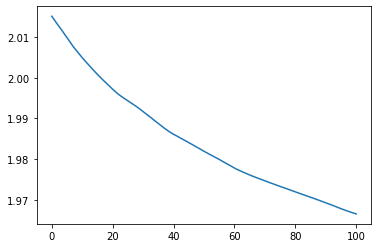

In [18]:
plt.plot(cost_list)
plt.show()

In [0]:
def forward (data, params):
  J_in = jaxnp.dot(data, jaxnp.transpose(params['w_1']))  + params['b_1']
  J_out = relu(J_in)
  K_in = jaxnp.dot(J_out,jaxnp.transpose(params['w_2'])) + params['b_2']
  K_out = sigmoid(K_in)
  L_in = jaxnp.dot(K_out,jaxnp.transpose(params['w_3'])) + params['b_3']
  L_out = softmax(L_in)
  return L_out

In [17]:
prediction = forward(data_test,params)
pred_df = pd.DataFrame(prediction,columns=['[d   a','   t   ','  a]'])
label_df = pd.DataFrame(label_test,columns=['[L  a','b  e','l  s]'])
result = pd.concat([pred_df,label_df],axis=1)
result.head(10)

,[d a,t,a],[L a,b e,l s]
0,0.433730,0.207069,0.359200,0.0,0.0,1.0
1,0.433730,0.207069,0.359200,0.0,0.0,1.0
2,0.433730,0.207069,0.359200,0.0,1.0,0.0
3,0.422104,0.275083,0.302813,0.0,1.0,0.0
4,0.426585,0.244961,0.328454,0.0,0.0,1.0
5,0.433730,0.207069,0.359200,0.0,0.0,1.0
6,0.428353,0.235910,0.335737,0.0,1.0,0.0
7,0.433730,0.207069,0.359200,0.0,1.0,0.0
8,0.433730,0.207069,0.359200,0.0,0.0,1.0
9,0.428978,0.232726,0.338297,0.0,1.0,0.0
